<p style="font-size:300%; text-align:center;line-height : 80px; margin : 0; padding : 0;font-weight:bold">
Segundo avance proyecto - Visión de máquina</p>


Integrantes: 
<ul style="font-size:120%; line-height : 30px; margin-top : 0; ">
  <li>Mateo Andres Rodriguez</li>
  <li>Sebastian Campiño Figueroa</li>
</ul>

##  El avance presente no contiene el código del primer avance dentro de este notebook, para revisar el avance previo por favor revisar el notebook de la primera entrega

# Diagrama de flujo proyecto

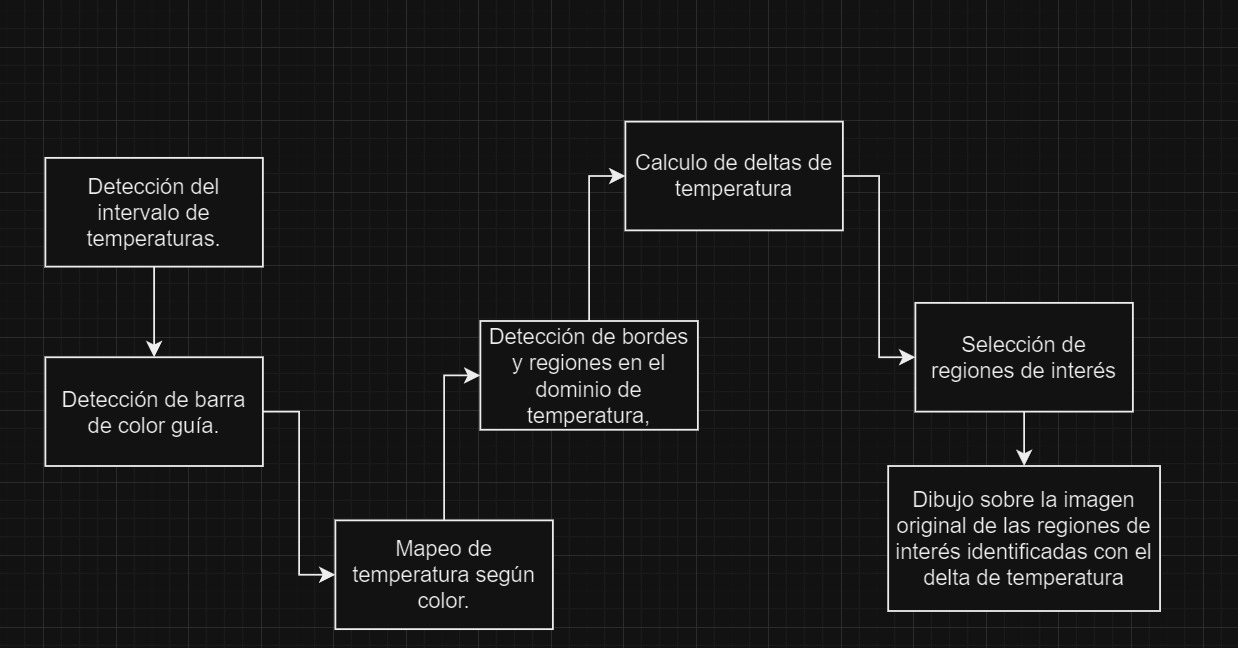

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract

# Set the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\pc\AppData\Local\Tesseract-OCR\tesseract.exe'


# Cargar la imagen original y convertirla a escala de grises
image = cv2.imread('1.jpg')
gray = cv2.imread('1.jpg', 0)



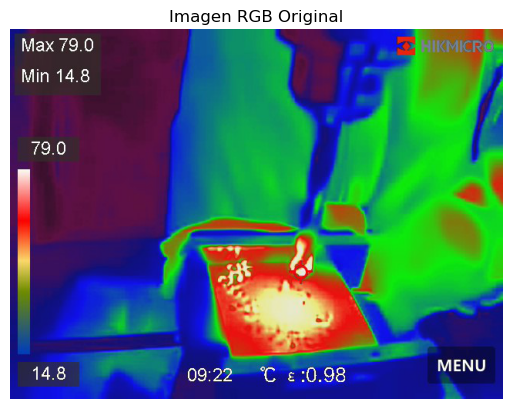

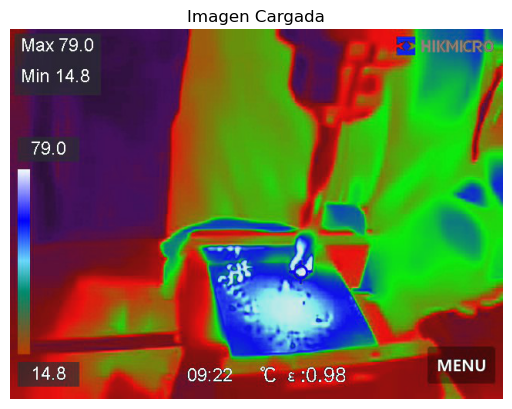

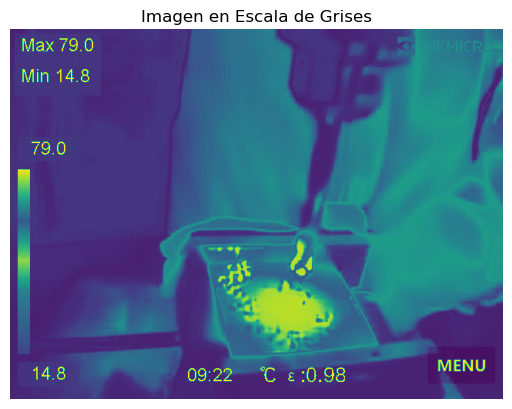

In [2]:
# Convertir la imagen original a formato RGB para mostrar colores adecuadamente
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen RGB original
plt.imshow(image_rgb)
plt.title('Imagen RGB Original')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar la imagen en su forma cargada
plt.imshow(image)
plt.title('Imagen Cargada')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar la imagen en escala de grises
plt.show()
plt.imshow(gray)
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar los ejes
plt.show()



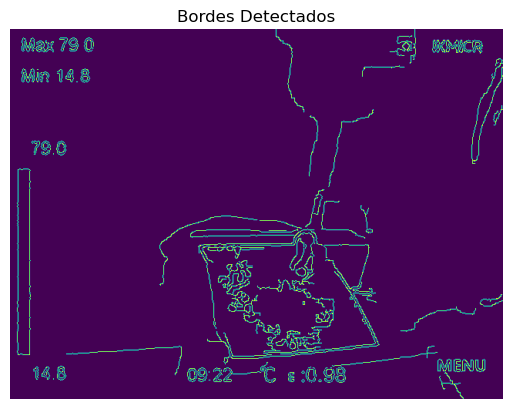

In [3]:
# Detectar bordes en la imagen en escala de grises
edged = cv2.Canny(gray, 50, 200)

# Mostrar los bordes detectados
plt.show()
plt.show()
plt.imshow(edged)
plt.title('Bordes Detectados')
plt.axis('off')  # Ocultar los ejes
plt.show()


In [4]:
# Encontrar los contornos en los bordes detectados
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
        



(array([[[412, 458]],

       [[415, 458]]], dtype=int32), array([[[391, 458]]], dtype=int32), array([[[388, 457]]], dtype=int32), array([[[418, 456]],

       [[417, 457]]], dtype=int32), array([[[267, 455]],

       [[268, 455]]], dtype=int32), array([[[258, 455]],

       [[259, 455]]], dtype=int32), array([[[402, 454]],

       [[400, 456]],

       [[401, 457]],

       [[403, 457]],

       [[404, 456]]], dtype=int32), array([[[380, 454]],

       [[378, 456]],

       [[380, 458]],

       [[382, 456]]], dtype=int32), array([[[ 56, 453]],

       [[ 56, 454]]], dtype=int32), array([[[269, 452]],

       [[268, 453]],

       [[269, 452]],

       [[270, 452]]], dtype=int32), array([[[252, 452]],

       [[250, 454]],

       [[247, 454]],

       [[246, 453]],

       [[244, 453]],

       [[245, 453]],

       [[246, 454]],

       [[250, 454]]], dtype=int32), array([[[423, 450]],

       [[423, 451]],

       [[422, 452]],

       [[422, 453]],

       [[423, 454]],

       [[

Coordenadas del rectángulo: (9, 181) (27, 423)
Altura: 242
Ancho: 18
Área: 3666.0


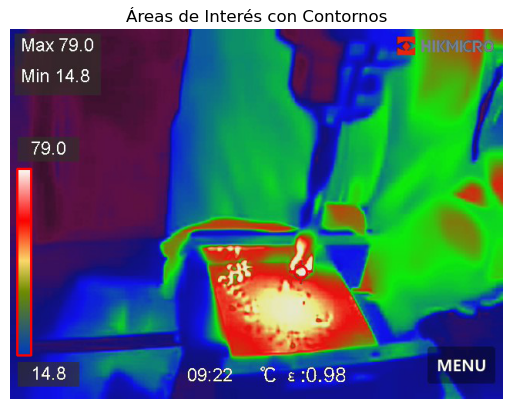

In [5]:
for contour in contours:
    # Filtrar contornos por área (ajustar el valor si es necesario)
    if cv2.contourArea(contour) > 1000:
        # Obtener las coordenadas del rectángulo del contorno
        x, y, w, h = cv2.boundingRect(contour)
        
        # Dibujar un rectángulo alrededor del área de interés en color rojo
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Rojo: BGR (0, 0, 255)
        
        # Imprimir las coordenadas de los 4 puntos del rectángulo, la altura, el ancho y el área
        print("Coordenadas del rectángulo:", (x, y), (x + w, y + h))
        print("Altura:", h)
        print("Ancho:", w)
        print("Área:", cv2.contourArea(contour))
        
        x_ref = x
        y_ref = y
        x2_ref = x + w
        y2_ref = y + h

# Mostrar la imagen con los contornos resaltados en color blanco
plt.show()
plt.show()
plt.imshow(image_rgb)
plt.title('Áreas de Interés con Contornos')
plt.axis('off')  # Ocultar los ejes
plt.show()

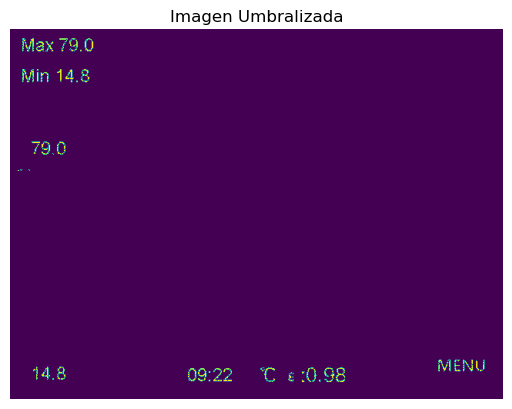

In [6]:
# Aplicar umbralización a la imagen en escala de grises
ret, thresh1 = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

# Mostrar la imagen umbralizada
plt.show()
plt.imshow(thresh1)
plt.title('Imagen Umbralizada')
plt.axis('off')  # Ocultar los ejes
plt.show()



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


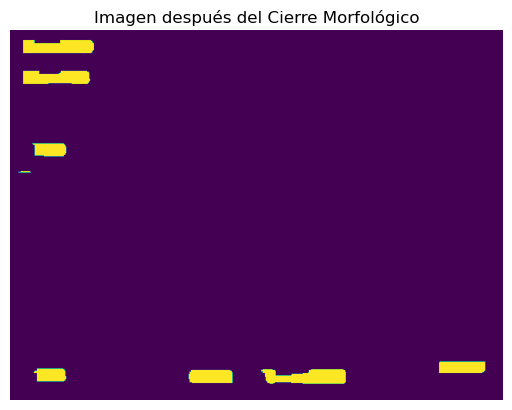

In [7]:
# Imprimir la matriz de umbralización
print(thresh1)

# Crear un kernel para operaciones morfológicas
kernel = np.ones((20, 20), np.uint8)

# Realizar una operación de cierre morfológico en la imagen umbralizada
joined = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

# Encontrar contornos en la imagen después del cierre morfológico
contours, _ = cv2.findContours(joined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mostrar la imagen después del cierre morfológico
plt.show()
plt.imshow(joined)
plt.title('Imagen después del Cierre Morfológico')
plt.axis('off')  # Ocultar los ejes
plt.show()



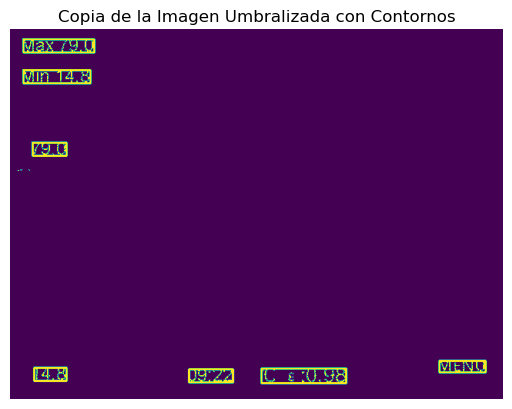

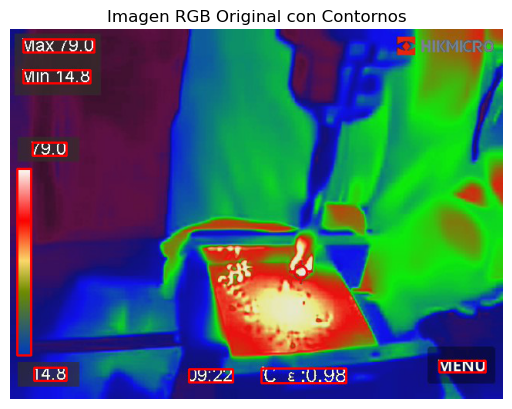

In [8]:
# Crear una copia de la imagen umbralizada
out = thresh1.copy()

# Iterar a través de los contornos después del cierre morfológico
for contour in contours:
    # Filtrar contornos por área (ajustar el valor si es necesario)
    if cv2.contourArea(contour) > 100:
        x, y, w, h = cv2.boundingRect(contour)
        
        # Dibujar un rectángulo alrededor del área de interés en la imagen RGB original
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Dibujar un rectángulo en la copia de la imagen umbralizada
        cv2.rectangle(out, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Mostrar la copia de la imagen umbralizada con los contornos
plt.show()
plt.imshow(out)
plt.title('Copia de la Imagen Umbralizada con Contornos')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Mostrar la imagen RGB original con los contornos
plt.show()
plt.imshow(image_rgb)
plt.title('Imagen RGB Original con Contornos')
plt.axis('off')  # Ocultar los ejes
plt.show()

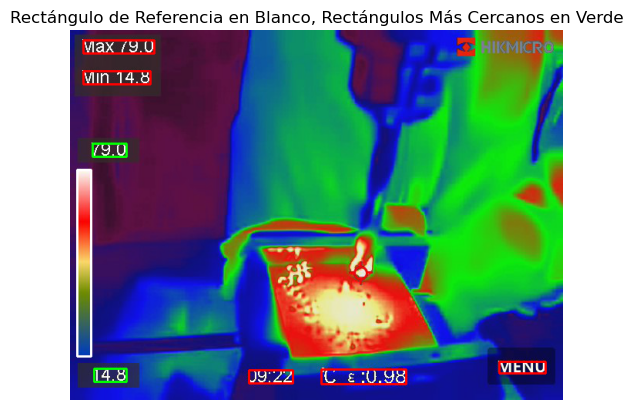

Coordenadas de los rectángulos: [(29, 147, 44, 17), (31, 439, 42, 17)]


In [9]:
# Variables para los rectángulos más cercanos en las esquinas superior derecha e izquierda
top_right_rectangle = None
bottom_right_rectangle = None
min_distance_top_right = float('inf')
min_distance_bottom_right = float('inf')

# Lista para almacenar las coordenadas de los rectángulos
coordinates_ranges = []

# Iterar a través de los contornos y seleccionar los rectángulos más cercanos
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    center_x = x + w // 2
    center_y = y + h // 2

    # Calcular la distancia desde el centro del rectángulo de referencia
    distance = np.sqrt((center_x - (x_ref + x2_ref / 2)) ** 2 + (center_y - (y_ref + y2_ref / 2)) ** 2)

    # Seleccionar el rectángulo más cercano a la esquina superior derecha
    if center_x > (x2_ref) and center_y < (y2_ref) and distance < min_distance_top_right:
        top_right_rectangle = (x, y, w, h)
        min_distance_top_right = distance

    # Seleccionar el rectángulo más cercano a la esquina inferior derecha
    if center_x > (x2_ref) and center_y > (y2_ref) and distance < min_distance_bottom_right:
        bottom_right_rectangle = (x, y, w, h)
        min_distance_bottom_right = distance

# Agregar las coordenadas de los rectángulos a la lista
if top_right_rectangle is not None:
    coordinates_ranges.append(top_right_rectangle)
if bottom_right_rectangle is not None:
    coordinates_ranges.append(bottom_right_rectangle)

# Crear una copia de la imagen RGB original para dibujar los rectángulos
image_rgb_copy = image_rgb.copy()

# Dibujar el rectángulo de referencia en blanco
cv2.rectangle(image_rgb_copy, (x_ref, y_ref), (x2_ref, y2_ref), (255, 255, 255), 2)  # Blanco: BGR (255, 255, 255)

# Dibujar los rectángulos más cercanos en verde
for rect in coordinates_ranges:
    x, y, w, h = rect
    cv2.rectangle(image_rgb_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Verde: BGR (0, 255, 0)

# Mostrar la imagen con los rectángulos resaltados
plt.show()
plt.imshow(image_rgb_copy)
plt.title('Rectángulo de Referencia en Blanco, Rectángulos Más Cercanos en Verde')
plt.axis('off')  # Ocultar los ejes
plt.show()

#print(x_ref,y_ref)
#print(x2_ref,y2_ref)

# Imprimir las coordenadas de los rectángulos
print("Coordenadas de los rectángulos:", coordinates_ranges)


In [12]:
image = cv2.imread('1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the coordinates of the green rectangles (top and bottom)
top_rectangle = coordinates_ranges[0]
bottom_rectangle = coordinates_ranges[1]

# Increase the size of the green rectangles by 20%
green_rectangle_expansion = 0.2  # 20% expansion

top_rectangle_expanded = (
    int(top_rectangle[0] - top_rectangle[2] * green_rectangle_expansion),
    int(top_rectangle[1] - top_rectangle[3] * green_rectangle_expansion),
    int(top_rectangle[2] * (1 + 2 * green_rectangle_expansion)),
    int(top_rectangle[3] * (1 + 2 * green_rectangle_expansion))
)

bottom_rectangle_expanded = (
    int(bottom_rectangle[0] - bottom_rectangle[2] * green_rectangle_expansion),
    int(bottom_rectangle[1] - bottom_rectangle[3] * green_rectangle_expansion),
    int(bottom_rectangle[2] * (1 + 2 * green_rectangle_expansion)),
    int(bottom_rectangle[3] * (1 + 2 * green_rectangle_expansion))
)

# Extract temperature values from the expanded green rectangles
top_roi_expanded = image_rgb[top_rectangle_expanded[1]:top_rectangle_expanded[1] + top_rectangle_expanded[3],
                             top_rectangle_expanded[0]:top_rectangle_expanded[0] + top_rectangle_expanded[2]]

bottom_roi_expanded = image_rgb[bottom_rectangle_expanded[1]:bottom_rectangle_expanded[1] + bottom_rectangle_expanded[3],
                                bottom_rectangle_expanded[0]:bottom_rectangle_expanded[0] + bottom_rectangle_expanded[2]]

custom_config = r'--oem 3 --psm 6'
top_temperature_expanded = pytesseract.image_to_string(top_roi_expanded, config=custom_config)
bottom_temperature_expanded = pytesseract.image_to_string(bottom_roi_expanded, config=custom_config)

# Check if the extracted text is a valid numeric value
if top_temperature_expanded.strip().replace('.', '', 1).isdigit():
    top_temperature_expanded = float(top_temperature_expanded)
else:
    # Handle the case where top_temperature is not a valid numeric value
    top_temperature_expanded = None

if bottom_temperature_expanded.strip().replace('.', '', 1).isdigit():
    bottom_temperature_expanded = float(bottom_temperature_expanded)
else:
    # Handle the case where bottom_temperature is not a valid numeric value
    bottom_temperature_expanded = None
    
# Display the results
print("Temperature values:")
if top_temperature_expanded is not None:
    print("Top Rectangle (Expanded):", top_temperature_expanded)
if bottom_temperature_expanded is not None:
    print("Bottom Rectangle (Expanded):", bottom_temperature_expanded)

delta_temperature= top_temperature_expanded - bottom_temperature_expanded

print("Temperature Delta:", delta_temperature,"celcius.")

Temperature values:
Top Rectangle (Expanded): 79.0
Bottom Rectangle (Expanded): 14.8
Temperature Delta: 64.2 celcius.


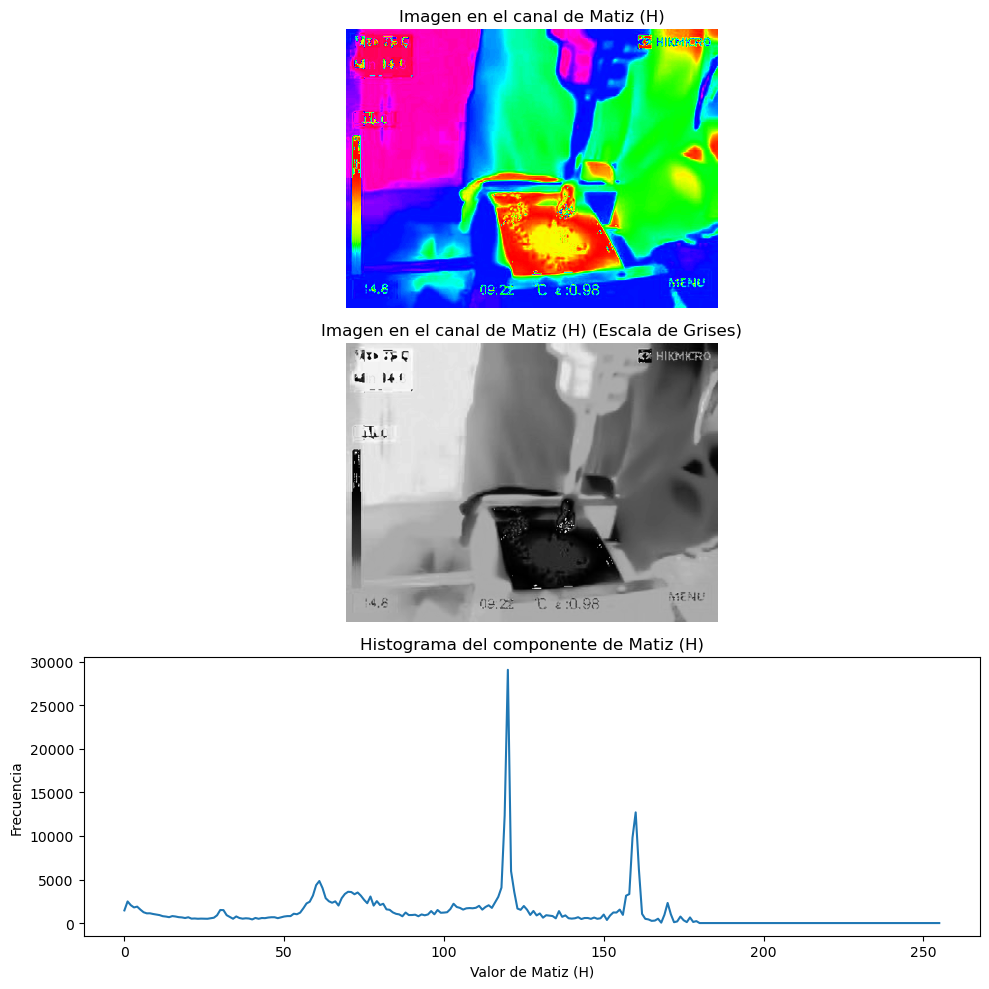

In [13]:
# Lee la imagen
image = cv2.imread('1.jpg')

# Convierte la imagen a HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extrae el canal de Matiz (H)
hue_channel = image_hsv[:, :, 0]

# Cálculo del histograma
hist = cv2.calcHist([hue_channel], [0], None, [256], [0, 256])

# Crear un subplot de 3x1
plt.figure(figsize=(10, 10))

# Subplot 1: Imagen en el canal de Matiz (H)
plt.subplot(3, 1, 1)
plt.imshow(hue_channel, cmap='hsv')
plt.title('Imagen en el canal de Matiz (H)')
plt.axis('off')

# Subplot 2: Imagen en el canal de Matiz (H) en escala de grises
plt.subplot(3, 1, 2)
plt.imshow(hue_channel, cmap='gray')
plt.title('Imagen en el canal de Matiz (H) (Escala de Grises)')
plt.axis('off')

# Subplot 3: Histograma del componente de Matiz (H)
plt.subplot(3, 1, 3)
plt.plot(hist)
plt.title('Histograma del componente de Matiz (H)')
plt.xlabel('Valor de Matiz (H)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


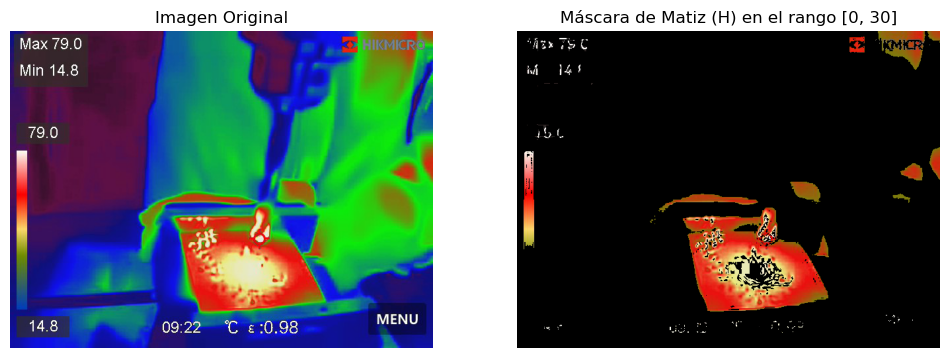

In [14]:
# Define los umbrales para el rango entre 0 y 50
umbral_min = 0
umbral_max = 30

# Crea una máscara con los puntos de Matiz (H) dentro del rango
mask = ((hue_channel >= umbral_min) & (hue_channel <= umbral_max)).astype(np.uint8) * 255

# Aplica la máscara en la imagen original
result = cv2.bitwise_and(image, image, mask=mask)

# Muestra la imagen con la máscara aplicada
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Máscara de Matiz (H) en el rango [0, 30]')
plt.axis('off')
plt.show()


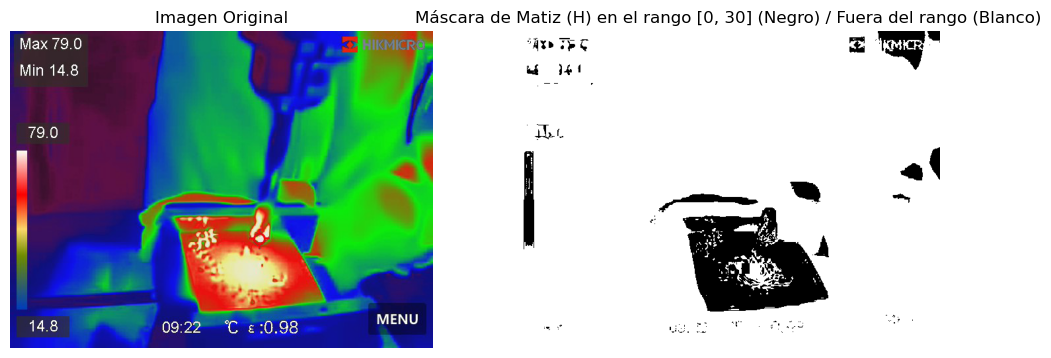

In [15]:
# Crea una máscara con los puntos de Matiz (H) dentro del rango
mask = ((hue_channel >= umbral_min) & (hue_channel <= umbral_max)).astype(np.uint8) * 255

# Invierte la máscara (los puntos dentro del rango serán negros y los puntos fuera del rango serán blancos)
inverted_mask = 255 - mask

# Crea un subplot con 1 fila y 2 columnas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(inverted_mask, cmap='gray')
plt.title('Máscara de Matiz (H) en el rango [0, 30] (Negro) / Fuera del rango (Blanco)')
plt.axis('off')

# Muestra la imagen original junto a la máscara
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.show()


### Fórmula de Interpolación Lineal

La interpolación lineal se puede utilizar para asignar temperaturas a cada valor de píxel en una barra de colores. Aquí está la fórmula:

$ \text{Temperatura} = \text{TemperaturaMinima} + \left(\frac{\text{ValorDelPixel} - \text{ValorMinimo}}{\text{ValorMaximo} - \text{ValorMinimo})}\right) \times (\text{TemperaturaMaxima} - \text{TemperaturaMinima}) $

Donde:
- "Temperatura" es la temperatura asociada al valor del píxel en la barra.
- "Temperatura mínima" es el valor mínimo de temperatura que tiene la termografía.
- "Valor del píxel" es el valor de intensidad del píxel en la escala de grises de la barra.
- "Valor mínimo" es el valor mínimo de intensidad de píxeles en la barra (puede ser 0 si es escala de grises).
- "Rango de valores de píxeles" es la diferencia entre el valor máximo y el valor mínimo de intensidad de píxeles en la barra.
- "Temperatura máxima" es el valor máximo de temperatura que tiene la termografía.

Esta fórmula te permite asignar temperaturas a cada píxel en la barra de colores basándote en su intensidad de escala de grises.


[[60 60 60 ... 37 37 37]
 [60 60 60 ... 37 37 37]
 [60 60 60 ... 37 37 37]
 ...
 [37 37 37 ... 35 35 35]
 [37 37 37 ... 35 35 35]
 [37 37 37 ... 35 35 35]]


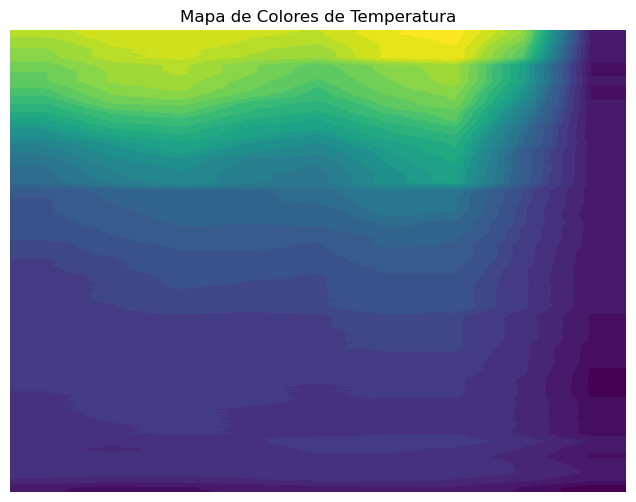

In [16]:
# Define los valores mínimo y máximo de temperatura
temp_min = bottom_temperature_expanded
temp_max = top_temperature_expanded

# Crea una copia de la imagen RGB y conviértela a espacio de color HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Extrae el plano de matiz (H) que representa la barra de colores
bar_hue = image_hsv[y_ref:y2_ref, x_ref:x2_ref, 0]

# Define las coordenadas de la barra
bar_rectangle = (x_ref, y_ref, x2_ref, y2_ref)

# Reduzca las esquinas de la barra en un 10% y 5%
reduccion_porcentajex = 0.01
reduccion_porcentajey = 0.005

x, y, w, h = bar_rectangle
nueva_x = int(x + w * reduccion_porcentajex)
nueva_y = int(y + h * reduccion_porcentajey)
nueva_x2 = int(x2_ref - w * reduccion_porcentajex)
nueva_y2 = int(y2_ref - h * reduccion_porcentajey)

# Realiza el recorte de la región de interés (barra) en el canal de matiz (H) y redimensiona al tamaño de la imagen original
bar_hue = cv2.resize(bar_hue[nueva_y:nueva_y2, nueva_x:nueva_x2], (image_rgb.shape[1], image_rgb.shape[0]))

# Realiza el mapeo de la barra de colores a temperaturas
bar_temperature_mapping = (1 - (bar_hue / 179)) * (temp_max - temp_min) + temp_min

bar_temperature_mapping_int = bar_temperature_mapping.astype(int)

print(bar_temperature_mapping_int )

# Muestra la imagen original junto a la máscara
plt.figure(figsize=(12, 6))
plt.imshow(bar_temperature_mapping_int)  # Usamos 'jet' para el mapa de colores
plt.title('Mapa de Colores de Temperatura')
plt.axis('off')
plt.show()


keys,  
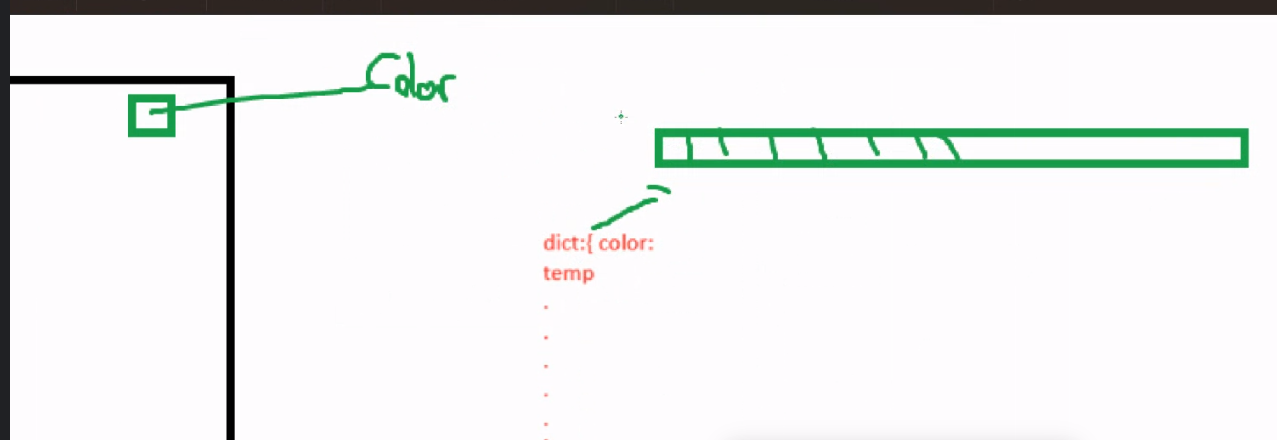

In [17]:
# Cargar la imagen termográfica
image = cv2.imread('1.jpg')

# Convertir la imagen a espacio de color HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir las coordenadas de los rectángulos verdes expandidos (top y bottom)
top_rectangle_expanded = coordinates_ranges[0]
bottom_rectangle_expanded = coordinates_ranges[1]

# Obtener las coordenadas y dimensiones de los rectángulos
x_top, y_top, w_top, h_top = top_rectangle_expanded
x_bottom, y_bottom, w_bottom, h_bottom = bottom_rectangle_expanded

# Calcular el rango de temperaturas
min_temp = bottom_temperature_expanded
max_temp = top_temperature_expanded

# Crear un diccionario para almacenar los valores de la máscara H y las temperaturas asociadas
data_dict = {}

# Obtener la columna de un píxel de grosor desde el rectángulo superior al inferior
for y in range(y_top, y_bottom + h_bottom):
    # Obtener el valor de la máscara H en el píxel actual
    h_value = image_hsv[y, x_top, 0]
    
    # Calcular la temperatura asociada al píxel en función de su posición vertical
    # Suponemos que el cambio de temperatura es lineal de abajo hacia arriba
    temp = min_temp + (max_temp - min_temp) * (y - y_bottom) / (h_bottom - 1)
    
    # Almacenar los valores en el diccionario
    data_dict[y] = {'H_mask': h_value, 'Temperature': temp}

# Imprimir el diccionario resultante
print(data_dict)


{147: {'H_mask': 150, 'Temperature': -1156.8500000000001}, 148: {'H_mask': 166, 'Temperature': -1152.8375}, 149: {'H_mask': 166, 'Temperature': -1148.825}, 150: {'H_mask': 166, 'Temperature': -1144.8125}, 151: {'H_mask': 166, 'Temperature': -1140.8000000000002}, 152: {'H_mask': 166, 'Temperature': -1136.7875000000001}, 153: {'H_mask': 166, 'Temperature': -1132.775}, 154: {'H_mask': 166, 'Temperature': -1128.7625}, 155: {'H_mask': 166, 'Temperature': -1124.75}, 156: {'H_mask': 166, 'Temperature': -1120.7375000000002}, 157: {'H_mask': 166, 'Temperature': -1116.7250000000001}, 158: {'H_mask': 166, 'Temperature': -1112.7125}, 159: {'H_mask': 166, 'Temperature': -1108.7}, 160: {'H_mask': 14, 'Temperature': -1104.6875}, 161: {'H_mask': 0, 'Temperature': -1100.6750000000002}, 162: {'H_mask': 157, 'Temperature': -1096.6625000000001}, 163: {'H_mask': 159, 'Temperature': -1092.65}, 164: {'H_mask': 170, 'Temperature': -1088.6375}, 165: {'H_mask': 178, 'Temperature': -1084.625}, 166: {'H_mask': 16

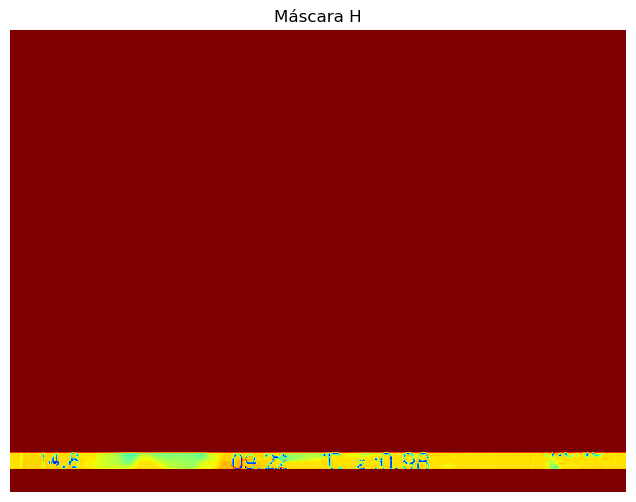

In [20]:
# Cargar la imagen termográfica
image = cv2.imread('1.jpg')

# Convertir la imagen a espacio de color HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Crear una imagen en blanco para la máscara H
h_mask = np.zeros_like(image_hsv[:, :, 0])

# Definir el rango de temperaturas de interés
min_temp = bottom_temperature_expanded
max_temp = top_temperature_expanded

# Recorrer la imagen en el espacio H
for y in range(image_hsv.shape[0]):
    for x in range(image_hsv.shape[1]):
        # Obtener el valor de la máscara H en el píxel actual
        h_value = image_hsv[y, x, 0]
        
        # Obtener la temperatura asociada al píxel en función de su posición vertical
        temp = min_temp + (max_temp - min_temp) * (y - y_bottom) / (h_bottom - 1)
        
        # Verificar si el valor de temperatura está dentro del rango de temperaturas de interés
        if min_temp <= temp <= max_temp:
            # Asignar el valor de máscara H correspondiente
            h_mask[y, x] = h_value
        else:
            # Asignar un valor predeterminado (179) a los píxeles que no coinciden con el rango de temperaturas
            h_mask[y, x] = 179

# Muestra la imagen original junto a la máscara
plt.figure(figsize=(12, 6))
plt.imshow(h_mask, cmap='jet')  # Usamos 'jet' para el mapa de colores
plt.title('Máscara H')
plt.axis('off')
plt.show()